## Loading in Data and Packages

In [201]:
import pandas as pd 
import numpy as np 
import altair as alt
import matplotlib.pyplot as plt

In [173]:
data = pd.read_csv('Downloads/emendata_analysis_data.csv')

In [123]:
data.head()

,contract_id,contract_name,complaints_2016,complaints_2017,complaints_2018,complaints_2019,leaving_2016,leaving_2017,leaving_2018,leaving_2019,care_2016,care_2017,care_2018,care_2019
0,H0104,Blue Cross And Blue Shield Of Alabama,0.09,0.04,0.04,0.04,0.06,0.03,0.04,0.03,0.89,0.86,0.85,0.85
1,H0154,"Viva Health, Inc.",0.06,0.06,0.06,0.05,0.06,0.07,0.05,0.05,0.87,0.87,0.86,0.87
2,H0251,"Unitedhealthcare Plan Of The River Valley, Inc.",0.16,0.12,0.13,0.12,0.10,0.09,0.08,0.05,0.88,0.86,0.85,0.87
3,H0294,Care Improvement Plus Wisconsin Insurance Company,0.25,0.22,0.17,0.04,0.13,0.22,0.16,0.11,0.84,0.86,0.85,0.85
4,H0302,"Medisun, Inc.",0.16,0.20,0.14,0.13,0.05,0.10,0.08,0.19,0.82,0.82,0.84,0.79


Is there any missing data? 

In [174]:
contract_name_groups = data.groupby('contract_name').size()

contract_name_groups
# there are 229 distinct healthcare agencies

contract_name
Aetna Health Inc. (ct)                        1
Aetna Health Inc. (fl)                        1
Aetna Health Inc. (me)                        1
Aetna Health Inc. (nj)                        1
Aetna Health Inc. (ny)                        1
                                             ..
Wellcare Health Insurance Of Arizona, Inc.    1
Wellcare Health Plans Of New Jersey, Inc.     1
Wellcare Of Connecticut, Inc.                 1
Wellcare Of Florida, Inc.                     1
Wellcare Of Georgia, Inc.                     1
Length: 229, dtype: int64

In [125]:
data.isnull().sum()
# there is no missing data

contract_id        0
contract_name      0
complaints_2016    0
complaints_2017    0
complaints_2018    0
complaints_2019    0
leaving_2016       0
leaving_2017       0
leaving_2018       0
leaving_2019       0
care_2016          0
care_2017          0
care_2018          0
care_2019          0
dtype: int64

In [34]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 267 entries, 0 to 266
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   contract_id      267 non-null    object 
 1   contract_name    267 non-null    object 
 2   complaints_2016  267 non-null    float64
 3   complaints_2017  267 non-null    float64
 4   complaints_2018  267 non-null    float64
 5   complaints_2019  267 non-null    float64
 6   leaving_2016     267 non-null    float64
 7   leaving_2017     267 non-null    float64
 8   leaving_2018     267 non-null    float64
 9   leaving_2019     267 non-null    float64
 10  care_2016        267 non-null    float64
 11  care_2017        267 non-null    float64
 12  care_2018        267 non-null    float64
 13  care_2019        267 non-null    float64
dtypes: float64(12), object(2)
memory usage: 29.3+ KB


## Exploratory Analysis

First split up the data into three datasets: complaints- rate of patients filing complaints against their healthcare plan, leaving- percentage of patients leaving their healthcare plan, and care- percentage of patients who rate their healtchare plan as the best

In [53]:
complaints_columns = data.columns[data.columns.str.contains('complaints')]

complaints_data = data[complaints_columns]

In [54]:
complaints_data

,complaints_2016,complaints_2017,complaints_2018,complaints_2019
0,0.09,0.04,0.04,0.04
1,0.06,0.06,0.06,0.05
2,0.16,0.12,0.13,0.12
3,0.25,0.22,0.17,0.04
4,0.16,0.20,0.14,0.13
...,...,...,...,...
262,0.23,0.19,0.18,0.15
263,0.20,0.22,0.17,0.16
264,0.17,0.19,0.14,0.14
265,0.29,0.26,0.24,0.19


In [177]:
# keeping the contract_id and contract_name in our dataset
complaints_data = pd.concat([data.iloc[:,:2], complaints_data], axis= 1)

Here we also want to add the mean across the four years we have and we will do this for each of the datasets

In [178]:
complaints_data['mean_complaints'] = complaints_data[['complaints_2016', 'complaints_2017', 'complaints_2018', 'complaints_2019']].agg('mean', axis=1)
complaints_data

,contract_id,contract_name,contract_id,contract_name,contract_id,contract_name,complaints_2016,complaints_2017,complaints_2018,complaints_2019,mean_complaints
0,H0104,Blue Cross And Blue Shield Of Alabama,H0104,Blue Cross And Blue Shield Of Alabama,H0104,Blue Cross And Blue Shield Of Alabama,0.09,0.04,0.04,0.04,0.0525
1,H0154,"Viva Health, Inc.",H0154,"Viva Health, Inc.",H0154,"Viva Health, Inc.",0.06,0.06,0.06,0.05,0.0575
2,H0251,"Unitedhealthcare Plan Of The River Valley, Inc.",H0251,"Unitedhealthcare Plan Of The River Valley, Inc.",H0251,"Unitedhealthcare Plan Of The River Valley, Inc.",0.16,0.12,0.13,0.12,0.1325
3,H0294,Care Improvement Plus Wisconsin Insurance Company,H0294,Care Improvement Plus Wisconsin Insurance Company,H0294,Care Improvement Plus Wisconsin Insurance Company,0.25,0.22,0.17,0.04,0.1700
4,H0302,"Medisun, Inc.",H0302,"Medisun, Inc.",H0302,"Medisun, Inc.",0.16,0.20,0.14,0.13,0.1575
...,...,...,...,...,...,...,...,...,...,...,...
262,R5342,Unitedhealthcare Insurance Company Of New York,R5342,Unitedhealthcare Insurance Company Of New York,R5342,Unitedhealthcare Insurance Company Of New York,0.23,0.19,0.18,0.15,0.1875
263,R5826,Humana Insurance Company,R5826,Humana Insurance Company,R5826,Humana Insurance Company,0.20,0.22,0.17,0.16,0.1875
264,R5941,"Anthem Insurance Companies, Inc.",R5941,"Anthem Insurance Companies, Inc.",R5941,"Anthem Insurance Companies, Inc.",0.17,0.19,0.14,0.14,0.1600
265,R6801,Care Improvement Plus Of Texas Insurance Company,R6801,Care Improvement Plus Of Texas Insurance Company,R6801,Care Improvement Plus Of Texas Insurance Company,0.29,0.26,0.24,0.19,0.2450


We can sort the complaints dataset to descending that way we can first see the insurance companies with the highest aggregated complaints.

In [184]:
sorted_complaints_data = complaints_data.sort_values('mean_complaints', ascending = False)
# here a high complaint value indicates the plan is performing poorly
# reseting the index with our sorted values 
sorted_complaints_data = sorted_complaints_data.reset_index()

highest_complaints = sorted_complaints_data.head()
highest_complaints

,index,contract_id,contract_name,contract_id,contract_name,contract_id,contract_name,complaints_2016,complaints_2017,complaints_2018,complaints_2019,mean_complaints
0,50,H1666,Hcsc Insurance Services Company,H1666,Hcsc Insurance Services Company,H1666,Hcsc Insurance Services Company,1.59,0.86,0.55,0.48,0.8700
1,189,H5422,Blue Cross Blue Shield Healthcare Plan Of Georgia,H5422,Blue Cross Blue Shield Healthcare Plan Of Georgia,H5422,Blue Cross Blue Shield Healthcare Plan Of Georgia,0.31,1.44,1.19,0.42,0.8400
2,55,H2029,"Humana Insurance Of Puerto Rico, Inc.",H2029,"Humana Insurance Of Puerto Rico, Inc.",H2029,"Humana Insurance Of Puerto Rico, Inc.",0.50,0.81,0.52,0.52,0.5875
3,24,H0913,"Wellcare Health Plans Of New Jersey, Inc.",H0913,"Wellcare Health Plans Of New Jersey, Inc.",H0913,"Wellcare Health Plans Of New Jersey, Inc.",0.22,1.23,0.22,0.64,0.5775
4,137,H3822,Health Care Service Corporation,H3822,Health Care Service Corporation,H3822,Health Care Service Corporation,0.91,0.62,0.26,0.29,0.5200


Here we are repeating the process we did for the complaints dataset with the data we have for people who left their healthcare provider.

In [185]:
leaving_columns = data.columns[data.columns.str.contains('leaving')]

leaving_data = data[leaving_columns]

leaving_data = pd.concat([data.iloc[:,:2], leaving_data], axis = 1)

leaving_data['mean_leaving'] = leaving_data[['leaving_2016', 'leaving_2017', 'leaving_2018', 'leaving_2019']].agg('mean', axis=1)

leaving_data

,contract_id,contract_name,leaving_2016,leaving_2017,leaving_2018,leaving_2019,mean_leaving
0,H0104,Blue Cross And Blue Shield Of Alabama,0.06,0.03,0.04,0.03,0.0400
1,H0154,"Viva Health, Inc.",0.06,0.07,0.05,0.05,0.0575
2,H0251,"Unitedhealthcare Plan Of The River Valley, Inc.",0.10,0.09,0.08,0.05,0.0800
3,H0294,Care Improvement Plus Wisconsin Insurance Company,0.13,0.22,0.16,0.11,0.1550
4,H0302,"Medisun, Inc.",0.05,0.10,0.08,0.19,0.1050
...,...,...,...,...,...,...,...
262,R5342,Unitedhealthcare Insurance Company Of New York,0.12,0.12,0.10,0.27,0.1525
263,R5826,Humana Insurance Company,0.14,0.14,0.25,0.10,0.1575
264,R5941,"Anthem Insurance Companies, Inc.",0.07,0.13,0.11,0.20,0.1275
265,R6801,Care Improvement Plus Of Texas Insurance Company,0.19,0.19,0.13,0.14,0.1625


In [187]:
sorted_leave_data = leaving_data.sort_values('mean_leaving',ascending= False).reset_index()
# here a high leave value indicates that the plan performs poorly
highest_leave = sorted_leave_data.head()
highest_leave

,index,contract_id,contract_name,leaving_2016,leaving_2017,leaving_2018,leaving_2019,mean_leaving
0,247,H8554,Ghs Insurance Company,0.23,0.19,0.18,0.59,0.2975
1,24,H0913,"Wellcare Health Plans Of New Jersey, Inc.",0.19,0.28,0.23,0.25,0.2375
2,165,H4523,Aetna Health Inc. (tx),0.38,0.16,0.21,0.19,0.2350
3,204,H5549,Vns Choice,0.19,0.22,0.18,0.31,0.2250
4,7,H0351,"Health Net Of Arizona, Inc.",0.17,0.38,0.20,0.15,0.2250


Lastly we repeat the above steps with the care data, i.e. how satisfied a customer is with their healthcare provider.

In [188]:
care_columns = data.columns[data.columns.str.contains('care')]

care_data = data[care_columns]

care_data = pd.concat([data.iloc[:,:2], care_data], axis = 1)
care_data

,contract_id,contract_name,care_2016,care_2017,care_2018,care_2019
0,H0104,Blue Cross And Blue Shield Of Alabama,0.89,0.86,0.85,0.85
1,H0154,"Viva Health, Inc.",0.87,0.87,0.86,0.87
2,H0251,"Unitedhealthcare Plan Of The River Valley, Inc.",0.88,0.86,0.85,0.87
3,H0294,Care Improvement Plus Wisconsin Insurance Company,0.84,0.86,0.85,0.85
4,H0302,"Medisun, Inc.",0.82,0.82,0.84,0.79
...,...,...,...,...,...,...
262,R5342,Unitedhealthcare Insurance Company Of New York,0.80,0.84,0.83,0.84
263,R5826,Humana Insurance Company,0.87,0.81,0.84,0.84
264,R5941,"Anthem Insurance Companies, Inc.",0.83,0.82,0.85,0.85
265,R6801,Care Improvement Plus Of Texas Insurance Company,0.83,0.85,0.84,0.84


In [189]:
care_data['mean_care'] = care_data[['care_2016', 'care_2017', 'care_2018', 'care_2019']].agg('mean', axis=1)
care_data

,contract_id,contract_name,care_2016,care_2017,care_2018,care_2019,mean_care
0,H0104,Blue Cross And Blue Shield Of Alabama,0.89,0.86,0.85,0.85,0.8625
1,H0154,"Viva Health, Inc.",0.87,0.87,0.86,0.87,0.8675
2,H0251,"Unitedhealthcare Plan Of The River Valley, Inc.",0.88,0.86,0.85,0.87,0.8650
3,H0294,Care Improvement Plus Wisconsin Insurance Company,0.84,0.86,0.85,0.85,0.8500
4,H0302,"Medisun, Inc.",0.82,0.82,0.84,0.79,0.8175
...,...,...,...,...,...,...,...
262,R5342,Unitedhealthcare Insurance Company Of New York,0.80,0.84,0.83,0.84,0.8275
263,R5826,Humana Insurance Company,0.87,0.81,0.84,0.84,0.8400
264,R5941,"Anthem Insurance Companies, Inc.",0.83,0.82,0.85,0.85,0.8375
265,R6801,Care Improvement Plus Of Texas Insurance Company,0.83,0.85,0.84,0.84,0.8400


In [192]:
# sort the mean care values from ascending 
sorted_care_data = care_data.sort_values('mean_care', ascending= True).reset_index()
# here the higher values indicates that people are satisfied with their care therefore we want to look at plans that have a lower care value.
lowest_care = sorted_care_data.head()
lowest_care

,index,contract_id,contract_name,care_2016,care_2017,care_2018,care_2019,mean_care
0,217,H5810,Molina Healthcare Of California,0.71,0.72,0.77,0.78,0.7450
1,211,H5608,"Denver Health Medical Plan, Inc.",0.74,0.76,0.76,0.76,0.7550
2,176,H5087,Easy Choice Health Plan Inc.,0.77,0.77,0.73,0.78,0.7625
3,7,H0351,"Health Net Of Arizona, Inc.",0.74,0.76,0.79,0.78,0.7675
4,214,H5656,"Selectcare Health Plans, Inc.",0.77,0.75,0.76,0.79,0.7675


## Data Visualization

In [216]:
fig1 = alt.Chart(lowest_care).mark_bar().encode(
    x = 'contract_name',
    y = 'mean_care'
).properties(width = 250, height = 250).interactive()

fig2 = alt.Chart(highest_leave).mark_bar().encode(
    x = 'contract_name',
    y = 'mean_leaving'
).properties(width = 250, height = 250)
fig3 = alt.Chart(highest_complaints).mark_bar().encode(
    x = 'contract_name',
    y = 'mean_complaints'
)
alt.hconcat(fig1,fig2)

alt.HConcatChart(...)

In [ ]:
# by looking at these bar charts side by side we can easily compare if there is overlap in the healthcare plans and we can further explore them
fig1 = alt.Chart(lowest_care).mark_bar().encode(
    x = 'contract_name',
    y = 'mean_care'
)
fig2 = alt.Chart(highest_leave).mark_bar().encode(
    x = 'contract_name',
    y = 'mean_leaving'
)
fig3 = alt.Chart(highest_complaints).mark_bar().encode(
    x = 'contract_name',
    y = 'mean_complaints'
)

alt.vconcat(fig1,fig2,fig3)


In [217]:
# now we want to go back to our origingal dataset and analyze the top five healthcare companies with the most complaints
data[data['contract_name'] == 'Blue Cross Blue Shield Healthcare Plan Of Georgia']

,contract_id,contract_name,complaints_2016,complaints_2017,complaints_2018,complaints_2019,leaving_2016,leaving_2017,leaving_2018,leaving_2019,care_2016,care_2017,care_2018,care_2019
189,H5422,Blue Cross Blue Shield Healthcare Plan Of Georgia,0.31,1.44,1.19,0.42,0.1,0.2,0.2,0.22,0.83,0.82,0.83,0.78


<function matplotlib.pyplot.show(close=None, block=None)>

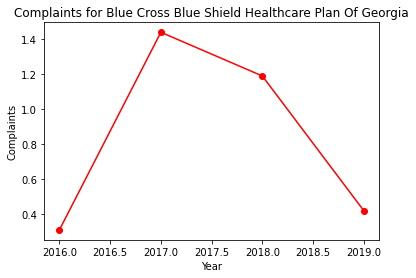

In [231]:
# data for the company blue cross
complaints = [0.31,1.44,1.19,0.42]
years = [2016,2017,2018,2019]

plt.plot(years, complaints, marker = 'o', linestyle ='-', color = 'r')

plt.xlabel('Year')
plt.ylabel('Complaints')
plt.title('Complaints for Blue Cross Blue Shield Healthcare Plan Of Georgia')
plt.show

In [218]:
data[data['contract_name'] == 'Hcsc Insurance Services Company']

,contract_id,contract_name,complaints_2016,complaints_2017,complaints_2018,complaints_2019,leaving_2016,leaving_2017,leaving_2018,leaving_2019,care_2016,care_2017,care_2018,care_2019
50,H1666,Hcsc Insurance Services Company,1.59,0.86,0.55,0.48,0.18,0.19,0.2,0.19,0.82,0.81,0.84,0.84


<function matplotlib.pyplot.show(close=None, block=None)>

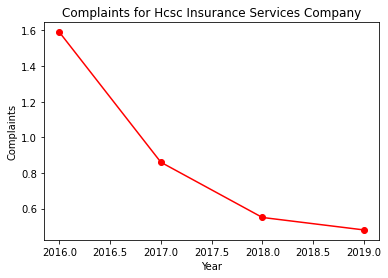

In [232]:
# data for the company aetna health 
complaints = [1.59,0.86,0.55,0.48]
years = [2016,2017,2018,2019]

plt.plot(years, complaints, marker = 'o', linestyle ='-', color = 'r')

plt.xlabel('Year')
plt.ylabel('Complaints')
plt.title('Complaints for Hcsc Insurance Services Company')
plt.show

In [219]:
data[data['contract_name'] == 'Aetna Health Inc. (tx)']

,contract_id,contract_name,complaints_2016,complaints_2017,complaints_2018,complaints_2019,leaving_2016,leaving_2017,leaving_2018,leaving_2019,care_2016,care_2017,care_2018,care_2019
165,H4523,Aetna Health Inc. (tx),0.29,0.54,0.42,0.23,0.38,0.16,0.21,0.19,0.79,0.85,0.82,0.83


<function matplotlib.pyplot.show(close=None, block=None)>

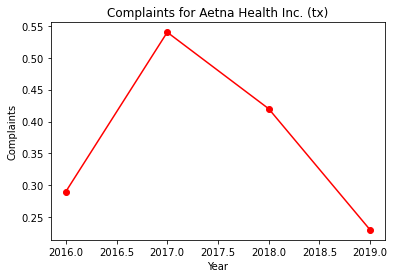

In [230]:
# data for the company aetna health 
complaints = [0.29,0.54,0.42,0.23]
years = [2016,2017,2018,2019]

plt.plot(years, complaints, marker = 'o', linestyle ='-', color = 'r')

plt.xlabel('Year')
plt.ylabel('Complaints')
plt.title('Complaints for Aetna Health Inc. (tx)')
plt.show

Another method we can use to find the five healthcare companies that we would need to investigate further is by looking at the most recent year, 2019, and finding the companies with the highest complaints, highest percentage of patients leaving, and the percentage of patients that are most dissatisfied with their care.

The healthcare company with the highest percentage of patients that left in 2019: Ghs Insurance Company, this company is also shown in our plot for the highest aggregated value of people leaving their healthcare provider. 

In [220]:
max_leaving_2019 = data['leaving_2019'].idxmax()
contract_name_max_leaving_2019 = data.loc[max_leaving_2019, 'contract_name']
print(contract_name_max_leaving_2019)

Ghs Insurance Company


In [221]:
data[data['contract_name'] == 'Ghs Insurance Company']

,contract_id,contract_name,complaints_2016,complaints_2017,complaints_2018,complaints_2019,leaving_2016,leaving_2017,leaving_2018,leaving_2019,care_2016,care_2017,care_2018,care_2019
247,H8554,Ghs Insurance Company,0.18,0.41,0.38,0.25,0.23,0.19,0.18,0.59,0.83,0.82,0.82,0.73


In [222]:
max_complaints_2019 = data['complaints_2019'].idxmax()
contract_name_max_complaints_2019 = data.loc[max_complaints_2019, 'contract_name']
print(contract_name_max_complaints_2019)

Care Improvement Plus South Central Insurance Co.


In [223]:
data[data['contract_name'] == 'Care Improvement Plus South Central Insurance Co.']

,contract_id,contract_name,complaints_2016,complaints_2017,complaints_2018,complaints_2019,leaving_2016,leaving_2017,leaving_2018,leaving_2019,care_2016,care_2017,care_2018,care_2019
186,H5322,Care Improvement Plus South Central Insurance Co.,0.78,0.38,0.34,0.35,0.15,0.19,0.28,0.20,0.84,0.77,0.84,0.84
232,H6528,Care Improvement Plus South Central Insurance Co.,0.24,0.20,0.21,1.08,0.26,0.21,0.01,0.14,0.86,0.85,0.84,0.84
261,R3444,Care Improvement Plus South Central Insurance Co.,0.25,0.26,0.16,0.16,0.14,0.14,0.11,0.12,0.87,0.83,0.85,0.84


In [224]:
min_care_2019 = data['care_2019'].idxmin()
contract_name_min_care_2019 = data.loc[min_care_2019, 'contract_name']
print(contract_name_min_care_2019)

Ghs Insurance Company


In [ ]:
sorted_complaints_data[sorted_complaints_data['contract_name'] == 'Ghs Insurance Company']

In [ ]:
sorted_leave_data[sorted_leave_data['contract_name'] == 'Ghs Insurance Company']

Looking at just the data for 2019, Ghs Insurance Company has the lowest care value, meaning patients feel their access to care is not the best. Ghs Insurance Company also has the highest rate of patients leaving this healthcare. Not only do they have the highest rate for 2019 but they also have the highest aggregate rate across all of the years. Furthermore, looking at the complaint data we can see that Ghs Insurance Company falls 18th in terms of the most aggregated complaints. Thus leading us to conlcude that Ghs Insurance Company is one of the top companies that should further be investigated.